In [ ]:
# Librerias
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
!pip install --quiet yfinance 
import yfinance as yf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 63.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 14.6 MB/s eta 0:00:00


Con el de kendall se busca hacer un conteo de pares concordantes y discondantes. Se hace la resta entre estos. Si son concordantes la correlación es positiva, y si es discordante es negativa.
Con spearmean se organiza de menor a mayor.Llegando a xt y yt. Identificar la poscicion del valor. Si el dato se repite se hace un promedio del conteo, el promedio de los datos repetidos y la poscicion sera la misma para esos datos repetidos. Con las diferencias d elugar se establece la relación y se establece la P de spearman: 6sumatoria d2/n(n2-1).
Ambas son correlaciones de rango.

# Correlaciones

In [ ]:
activos = ["MCD", "F"]
precios = yf.download(activos,start="2021-01-01",end="2022-12-31")["Adj Close"]
retornos = np.log(precios/precios.shift()).dropna()

[*********************100%***********************]  2 of 2 completed


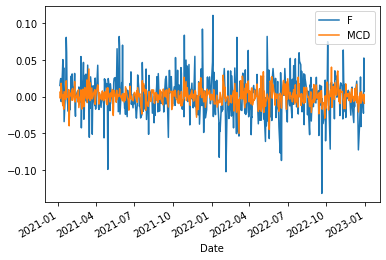

In [ ]:
retornos.plot()

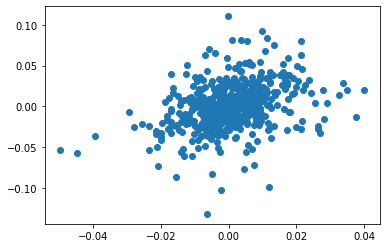

In [ ]:
plt.scatter(retornos['MCD'], retornos['F']);
#retornos.plot(kind="scatter",x="NAME1",y="NAME2"); AGREGAR LA LINEA DE PEARSON

## Correlación de Pearson

Medida de la dependencia lineal entre dos variables aleatorias (X,Y). 
$$ \rho_{x,y} = \frac{\sigma_{xy} } { \sigma_{y} \sigma_{y}} $$

In [ ]:
retornos.corr(method="pearson")

,F,MCD
F,1.000000,0.343311
MCD,0.343311,1.000000


## Correlación de Rango - tau de Kendall

Medida no paramétrica de la relación ordinal entre dos variables aleatorias (X,Y). 

$$ \tau_{x,y} = \frac{\# \text{de pares concordantes} - \# \text{de pares disccordantes} } { \frac{n(n-1)}{2}} $$

In [ ]:
import scipy.stats as stats
stats.kendalltau(retornos['MCD'], retornos['F'])

KendalltauResult(correlation=0.255663315059499, pvalue=1.109428880783492e-17)

In [ ]:
retornos['MCD'].corr(retornos['F'], method='kendall')

0.255663315059499

## Correlación de Rango de Spearman

Medida no paramétrica de la relación ordinal entre dos variables aleatorias (X,Y). 

$$ \rho_{x,y} = 1- \frac{ 6 \sum D^2 } { n(n^2-1) } $$

In [ ]:
stats.spearmanr(retornos['F'], retornos['MCD'])
# cuantas veces concuerdan, tener en cuenta la diferencia d elas posciciones. Magnitud de dicha relacion. Depender de los supuestos para construir el analisis.

SpearmanrResult(correlation=0.36683315995351046, pvalue=1.9533934493142136e-17)

In [ ]:
retornos['MCD'].corr(retornos['F'], method='spearman')

0.36683315995351046

# Modelos de Volatilidad

1. Close-to-close: desvest
2. Modelo de Parkinson
3. Modelo de Garman-Klass
4. Modelo EWMA

Los mejores modelos son genealizados, no constante en la ventana de tiempo del analisis. La volatilidad va a cambiar.

In [ ]:
p_name = yf.download("V",start="2021-01-01",end="2022-12-31")['Adj Close'].dropna()
r_name = np.log(p_name/p_name.shift(1)).dropna()
sigma = r_name.std()
sigma*np.sqrt(252)

[*********************100%***********************]  1 of 1 completed


0.2769008572687423

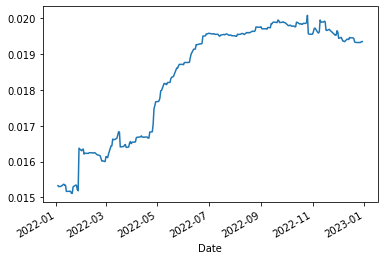

In [ ]:
std_m = r_name.rolling(window=252).std()
std_m.plot()
#caulculo actualizado a cada fecha, es un calculo movil, en una ventana de tiempo se calcula la std a una fecha y se mueve la fecha y asi susecivamente

## Volatilidad Close-to-close: desviación estándar

In [ ]:
#.std()

In [ ]:
#retornos.rolling(window=XXX).std()
#.plot()

## Medida de Parkinson

Incorpora información acerca de los precios "High" y "Low" para cada momento t. 

$$ \sigma_P = \sqrt{\frac{1}{4\ m\ ln (2)} \sum_{i=1}^{m} ln \Big(\frac{H_t}{L_t} \Big)^2 } $$

In [ ]:
precios = yf.download("TSLA",start="2021-01-01",end="2022-12-31").dropna()

[*********************100%***********************]  1 of 1 completed


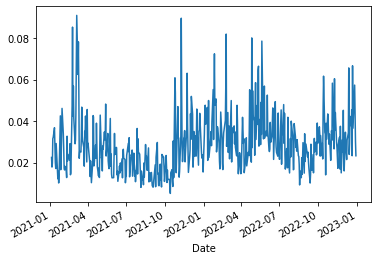

In [ ]:
lnHL = np.log(precios["High"]/precios["Low"]).dropna()
sigmaPark_d = ((1/(4*np.log(2)))*lnHL**2)**0.5
sigmaPark_d.plot()

In [ ]:
# Volatilidad anulizada de Parkinson
(sigmaPark_d.mean())*np.sqrt(252)

0.45698768966617764

## Medida de Garman-Klass

Además de las información acerca de los precios "High" y "Low" para cada momento t, incorpora los precios "Open" y "Close", buscando mejorar la estimación de la voaltilidad.

$$ \sigma_{GK} = \sqrt{\frac{1}{m} \sum_{i=1}^{m} \Big[ \frac{1}{2} ln \Big(\frac{H_t}{L_t} \Big)^2 -(2\ ln 2-1) ln \Big(\frac{C_t}{O_t} \Big)^2 \Big]} $$

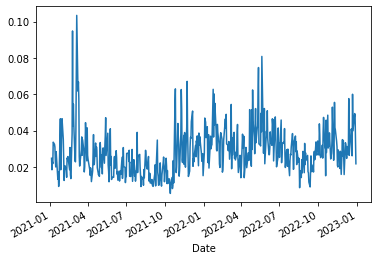

In [ ]:
lnHL = np.log(precios["High"]/precios["Low"]).dropna()
lnCO = np.log(precios["Close"]/precios["Open"]).dropna()
sigmaGK_d = (0.5*lnHL**2-(2*np.log(2)-1)*lnCO**2)**0.5
sigmaGK_d.plot()

In [ ]:
(sigmaGK_d.mean())*np.sqrt(252)

0.45317427344417927

## Volatilidad EWMA

Es una medida de volatilidad tiempo-dependiente que pondera con mayor peso las observaciones más recientes para el calculo de la varianza.

$$ \sigma_{EWMA}^2 = \sum_{k=1}^{m} \alpha_k^2 r^2_{t-k} $$

Tal que: $\sum_{k=1}^{m} \alpha_k = 1$ y $\alpha_1 > \alpha_2 > ... > \alpha_k$.\\

Dada la propiedad decreciente de $\alpha_k$, se tiene que: 

$$\alpha_k = (1-\lambda) \lambda^{k-1}$$
Por tanto:

$$ \sigma_{EWMA}^2 = (1-\lambda) \sum_{k=1}^{m} \lambda^{k-1} r^2_{t-k} $$

Que es equivalente a:

$$ \sigma_{EWMA}^2 = \lambda \sigma_{EWMA}^2 (t-1) + (1 - \lambda) r^2_{t-1} $$

Esta medida fue impulsada por J. P. Morgan’s RiskMetrics al utilizar un $\lambda=0.94$.

In [ ]:
## Implementar el código de la Vol EWMA paso a paso
##Integrantes: Juan David Velasquez y Jimena Ramirez
l = 0.94
k = 1
ewma = (1-l)*l**(k-1)*r_name.shift(1)**2
ewma

Date
2021-01-05 00:00:00-05:00             NaN
2021-01-06 00:00:00-05:00    1.356684e-05
2021-01-07 00:00:00-05:00    4.699270e-06
2021-01-08 00:00:00-05:00    1.869022e-06
2021-01-11 00:00:00-05:00    3.503254e-06
                                 ...     
2022-12-23 00:00:00-05:00    4.332836e-06
2022-12-27 00:00:00-05:00    8.428444e-07
2022-12-28 00:00:00-05:00    2.989949e-07
2022-12-29 00:00:00-05:00    2.397825e-06
2022-12-30 00:00:00-05:00    1.325856e-05
Name: Adj Close, Length: 502, dtype: float64